In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.axes
np.set_printoptions(suppress=True)

In [3]:
data_2019 = pd.read_csv('./WorkforceUtilizationSummaryReport2019.csv')

In [4]:
data_2020 = pd.read_csv('./WorkforceUtilizationCraftLevelReport2020.csv')

In [5]:
data_2020_trade = pd.read_csv('./WorkforceUtilizationSummaryReport2020.csv')

In [6]:
data_2019.head()

,MONTH,YEAR,PROJECT,PROJECT_CODE,CONTRACTOR,CONSTRUCTION_TRADE,CRAFT_LEVEL,TOTAL_EMPLOYEE,CAUCASIAN,AFRICAN_AMERICAN,HISPANIC,ASIAN,NATIVE_AMERICAN,OTHER,NOT_SPECIFIED,TOTAL_FEMALE,TOTAL_MALE,HOURS_WORKED_PER_MONTH
0,1,2019,AEP1802E UT1 C Utility Simple Fix,AEP1802E UT1 C,Rise engineering,INSULATOR (PIPES & TANKS),Journeymen,101.0,7.5,0.0,93.5,0.0,0.0,0.0,0.0,0.0,101.0,HOURS_PER_MONTH
1,1,2019,AEP1802E UT1 C Utility Simple Fix,AEP1802E UT1 C,Rise engineering,INSULATOR (PIPES & TANKS),Apprentice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HOURS_PER_MONTH
2,1,2019,CME0902 DC1 C Chief Medical Examiner Office We...,CME0902 DC1 CM,"Adams plumbing & heating, inc.",PLUMBERS & GASFITTERS,Journeymen,15.5,15.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5,HOURS_PER_MONTH
3,1,2019,CME0902 DC1 C Chief Medical Examiner Office We...,CME0902 DC1 CM,"Adams plumbing & heating, inc.",PLUMBERS & GASFITTERS,Apprentice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HOURS_PER_MONTH
4,1,2019,CME0902 DC1 C Chief Medical Examiner Office We...,CME0902 DC1 CM,Ayotte and king for tile inc.,FLOORCOVERER,Journeymen,26.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,HOURS_PER_MONTH


In [7]:
data_2020.head()

,Unnamed: 0,CRAFT_LEVEL,TOTAL_EMPLOYEE,CAUCASIAN,AFRICAN_AMERICAN,HISPANIC,ASIAN,NATIVE_AMERICAN,OTHER,NOT_SPECIFIED,TOTAL_FEMALE,TOTAL_MALE
0,0,Apprentice,37607.64,28035.14,2430.00,5803.50,713.0,40.0,586.00,0.0,3494.19,34113.45
1,1,Journeymen,437291.78,361819.41,16646.42,45654.77,5264.5,395.5,7503.18,8.0,11189.75,426102.03


## Exporting CSV files

In [8]:
def get_df_group_hours_by_trade(data, trades, groups_eth):
    '''returns df of groups over work hours'''
    df = pd.DataFrame(columns=['TRADE']+groups_eth)
    for i, trade in enumerate(trades):
        const = data.loc[data['CONSTRUCTION_TRADE'] == trade]
        cauc_trade = const['CAUCASIAN'].sum()
        afr_trade = const['AFRICAN_AMERICAN'].sum()
        his_trade = const['HISPANIC'].sum()
        asia_trade = const['ASIAN'].sum()
        nat_trade = const['NATIVE_AMERICAN'].sum()
        oth_trade = const['OTHER'].sum()
        not_trade = const['NOT_SPECIFIED'].sum()
        fem_trade = const['TOTAL_FEMALE'].sum()
        male_trade = const['TOTAL_MALE'].sum()
    #         trade_list.extend([[trade]] + [0])
        df.loc[i] = [trade] + [cauc_trade, afr_trade, his_trade, asia_trade, 
                               nat_trade, oth_trade, not_trade, fem_trade, male_trade]        
    return df

In [9]:
trade_2019 = data_2019['CONSTRUCTION_TRADE'].unique()
groups_eth = ['CAUCASIAN', 'AFRICAN_AMERICAN', 'HISPANIC', 'ASIAN','NATIVE_AMERICAN', 'OTHER', 'NOT_SPECIFIED', 'TOTAL_FEMALE','TOTAL_MALE']
df_2019 = get_df_group_hours_by_trade(data_2019, trade_2019, groups_eth)

In [10]:
trade_2020 = data_2020_trade['CONSTRUCTION_TRADE'].unique()
groups_eth = ['CAUCASIAN', 'AFRICAN_AMERICAN', 'HISPANIC', 'ASIAN','NATIVE_AMERICAN', 'OTHER', 'NOT_SPECIFIED', 'TOTAL_FEMALE','TOTAL_MALE']
df_2020 = get_df_group_hours_by_trade(data_2020_trade, trade_2020, groups_eth)

In [56]:
# Export to csv
df_2019.to_csv('./gropus_hours_over_trades_2019.csv', encoding='utf-8', index=False)
df_2020.to_csv('./gropus_hours_over_trades_2020.csv', encoding='utf-8', index=False)

## Anaylzing data

In [167]:
# top_trades = list(pd.Series.sort_values(df_2020.sum(axis=1), ascending=False)[:10].index)
# top_trades

In [11]:
top_trades = list(pd.Series.sort_values(df_2019.sum(axis=1), ascending=False)[:10].index)
top_trades

[3, 5, 8, 12, 1, 10, 21, 15, 14, 11]

In [12]:
# df_groups_top_trades_2020 = df_2020.iloc[top_trades][df_2020.columns[:-2]]
# df_groups_top_trades_2020

In [13]:
df_groups_top_trades_2019 = df_2019.iloc[top_trades][df_2019.columns[:-2]]
df_groups_top_trades_2019

,TRADE,CAUCASIAN,AFRICAN_AMERICAN,HISPANIC,ASIAN,NATIVE_AMERICAN,OTHER,NOT_SPECIFIED
3,CARPENTER,95002.95,2355.50,7014.15,343.0,112.0,1580.50,82.57
5,LABORER,77255.38,1807.75,13333.94,93.5,5.0,2035.95,0.00
8,ELECTRICIAN,68837.15,2656.75,9030.00,1076.5,0.0,157.50,0.00
12,BRICK/STONE/ARTIFICIAL MASONRY,23363.50,590.00,3184.50,0.0,0.0,0.00,40.00
1,PLUMBERS & GASFITTERS,17401.00,711.00,281.50,56.0,0.0,0.00,0.00
10,PIPEFITTER & STEAMFITTER,17143.50,529.00,489.50,0.0,0.0,0.00,0.00
21,"PAINTER / TAPER (BRUSH, NEW)",11325.57,1502.00,3203.50,614.0,0.0,10.00,16.77
15,SHEETMETAL WORKER,13563.25,328.00,2065.50,251.0,0.0,121.00,0.00
14,IRONWORKER/WELDER,13096.50,237.75,308.25,40.0,0.0,895.50,0.00
11,BACKHOE/FRONT-END LOADER,13638.50,566.58,30.50,198.0,0.0,0.00,0.00


In [107]:
df_groups_2020 = df_2020[df_2020.columns[:-2]]
df_groups_2020

,TRADE,CAUCASIAN,AFRICAN_AMERICAN,HISPANIC,ASIAN,NATIVE_AMERICAN,OTHER,NOT_SPECIFIED
0,PIPEFITTER,4570.50,180.00,526.00,0.0,32.0,0.00,0.0
1,PIPEFITTER & STEAMFITTER,29344.37,1362.00,953.00,37.0,0.0,0.00,0.0
2,ASBESTOS INSULATOR (PIPES & TANKS),300.50,0.00,104.00,0.0,0.0,0.00,0.0
3,INSULATOR (PIPES & TANKS),3822.00,16.00,473.50,0.0,0.0,294.00,0.0
4,CARPENTER,48805.24,1856.92,3869.25,0.0,39.0,1102.75,0.0
5,LABORER,70797.92,3106.00,15895.02,585.0,15.0,4072.04,8.0
6,OTHER POWER DRIVEN EQUIPMENT - CLASS II,3925.50,0.00,464.00,0.0,0.0,0.00,0.0
7,ELECTRICIAN,88316.25,5423.25,6869.50,2141.0,220.0,1135.48,0.0
8,BRICK/STONE/ARTIFICIAL MASONRY,15286.50,1816.50,1148.00,0.0,0.0,8.00,0.0
9,LABORER: MASON TENDER,6772.50,613.00,736.50,0.0,0.0,0.00,0.0


In [16]:
df_groups_2019 = df_2019[df_2019.columns[:-2]]
df_groups_2019

,TRADE,CAUCASIAN,AFRICAN_AMERICAN,HISPANIC,ASIAN,NATIVE_AMERICAN,OTHER,NOT_SPECIFIED
0,INSULATOR (PIPES & TANKS),4749.00,176.0,533.25,671.0,0.0,169.0,0.00
1,PLUMBERS & GASFITTERS,17401.00,711.0,281.50,56.0,0.0,0.0,0.00
2,FLOORCOVERER,1411.00,0.0,280.00,0.0,0.0,0.0,0.00
3,CARPENTER,95002.95,2355.5,7014.15,343.0,112.0,1580.5,82.57
4,GLAZIER (GLASS PLANK/AIR BARRIER/INTERIOR SYST...,3754.27,10.5,728.50,3.5,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...
64,FENCE & GUARD RAIL ERECTOR,36.50,20.5,0.00,0.0,0.0,16.0,0.00
65,PIPELAYER,64.00,0.0,0.00,0.0,0.0,0.0,0.00
66,FORK LIFT/CHERRY PICKER,95.00,0.0,0.00,0.0,0.0,0.0,0.00
67,DEMO: WRECKING LABORER,0.00,0.0,9.50,0.0,0.0,0.0,0.00


In [17]:
# df_groups_2020_relativ = df_groups_2020[df_groups_2020.columns[1:]].div(df_groups_2020.sum(axis=1), axis=0)

In [18]:
df_groups_2019_relativ = df_groups_2019[df_groups_2019.columns[1:]].div(df_groups_2019.sum(axis=1), axis=0)

In [19]:
df_groups_2019[df_groups_2019['TRADE']=='ELECTRICIAN']

,TRADE,CAUCASIAN,AFRICAN_AMERICAN,HISPANIC,ASIAN,NATIVE_AMERICAN,OTHER,NOT_SPECIFIED
8,ELECTRICIAN,68837.15,2656.75,9030.0,1076.5,0.0,157.5,0.0


In [21]:
df_groups_2019_relativ*100

,CAUCASIAN,AFRICAN_AMERICAN,HISPANIC,ASIAN,NATIVE_AMERICAN,OTHER,NOT_SPECIFIED
0,75.401897,2.794427,8.466638,10.653753,0.000000,2.683285,0.000000
1,94.316919,3.853763,1.525787,0.303531,0.000000,0.000000,0.000000
2,83.441750,0.000000,16.558250,0.000000,0.000000,0.000000,0.000000
3,89.212463,2.211931,6.586633,0.322094,0.105174,1.484168,0.077537
4,83.488148,0.233501,16.200517,0.077834,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
64,50.000000,28.082192,0.000000,0.000000,0.000000,21.917808,0.000000
65,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
66,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
67,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
df_groups_2019_relativ.mean(axis=0)*100

CAUCASIAN           77.282489
AFRICAN_AMERICAN     3.668648
HISPANIC            14.298029
ASIAN                1.232355
NATIVE_AMERICAN      0.453782
OTHER                1.610707
NOT_SPECIFIED        1.453990
dtype: float64

In [180]:
# df_relative_diff_2020 = df_groups_2020_relativ*100 - df_groups_2020_relativ.mean(axis=0) *100
# df_relative_diff_2020['TRADE'] = pd.Series(trade_2020)
# df_relative_diff_2020

In [24]:
df_relative_diff_2019 = df_groups_2019_relativ*100 - df_groups_2019_relativ.mean(axis=0) *100
df_relative_diff_2019['TRADE'] = pd.Series(trade_2019)
df_relative_diff_2019

,CAUCASIAN,AFRICAN_AMERICAN,HISPANIC,ASIAN,NATIVE_AMERICAN,OTHER,NOT_SPECIFIED,TRADE
0,-1.880592,-0.874221,-5.831392,9.421398,-0.453782,1.072578,-1.453990,INSULATOR (PIPES & TANKS)
1,17.034430,0.185115,-12.772243,-0.928823,-0.453782,-1.610707,-1.453990,PLUMBERS & GASFITTERS
2,6.159261,-3.668648,2.260220,-1.232355,-0.453782,-1.610707,-1.453990,FLOORCOVERER
3,11.929974,-1.456717,-7.711396,-0.910261,-0.348608,-0.126539,-1.376453,CARPENTER
4,6.205659,-3.435147,1.902488,-1.154521,-0.453782,-1.610707,-1.453990,GLAZIER (GLASS PLANK/AIR BARRIER/INTERIOR SYST...
...,...,...,...,...,...,...,...,...
64,-27.282489,24.413544,-14.298029,-1.232355,-0.453782,20.307101,-1.453990,FENCE & GUARD RAIL ERECTOR
65,22.717511,-3.668648,-14.298029,-1.232355,-0.453782,-1.610707,-1.453990,PIPELAYER
66,22.717511,-3.668648,-14.298029,-1.232355,-0.453782,-1.610707,-1.453990,FORK LIFT/CHERRY PICKER
67,-77.282489,-3.668648,85.701971,-1.232355,-0.453782,-1.610707,-1.453990,DEMO: WRECKING LABORER


In [25]:
pd.set_option('display.max_rows', 1000)

In [26]:
df_groups_2019

,TRADE,CAUCASIAN,AFRICAN_AMERICAN,HISPANIC,ASIAN,NATIVE_AMERICAN,OTHER,NOT_SPECIFIED
0,INSULATOR (PIPES & TANKS),4749.00,176.00,533.25,671.0,0.0,169.00,0.00
1,PLUMBERS & GASFITTERS,17401.00,711.00,281.50,56.0,0.0,0.00,0.00
2,FLOORCOVERER,1411.00,0.00,280.00,0.0,0.0,0.00,0.00
3,CARPENTER,95002.95,2355.50,7014.15,343.0,112.0,1580.50,82.57
4,GLAZIER (GLASS PLANK/AIR BARRIER/INTERIOR SYST...,3754.27,10.50,728.50,3.5,0.0,0.00,0.00
5,LABORER,77255.38,1807.75,13333.94,93.5,5.0,2035.95,0.00
6,CEMENT MASONRY/PLASTERING,3599.00,0.00,149.00,0.0,0.0,9.00,0.00
7,HVAC (TESTING AND BALANCING - AIR),366.00,0.00,0.00,0.0,0.0,0.00,0.00
8,ELECTRICIAN,68837.15,2656.75,9030.00,1076.5,0.0,157.50,0.00
9,PIPEFITTER,2572.00,536.00,967.00,4.0,0.0,48.50,0.00


In [27]:
df_relative_diff_2019.sort_values(by=['CAUCASIAN'],ascending=False)

,CAUCASIAN,AFRICAN_AMERICAN,HISPANIC,ASIAN,NATIVE_AMERICAN,OTHER,NOT_SPECIFIED,TRADE
68,22.717511,-3.668648,-14.298029,-1.232355,-0.453782,-1.610707,-1.453990,SPECIALIZED EARTH MOVING EQUIP > 35 TONS
20,22.717511,-3.668648,-14.298029,-1.232355,-0.453782,-1.610707,-1.453990,MARBLE- TILE-TERRAZZO MECHANIC
36,22.717511,-3.668648,-14.298029,-1.232355,-0.453782,-1.610707,-1.453990,MECHANICS MAINTENANCE
38,22.717511,-3.668648,-14.298029,-1.232355,-0.453782,-1.610707,-1.453990,"FIELD ENG.INST.PERSON-BLDG,SITE,HVY/HWY"
41,22.717511,-3.668648,-14.298029,-1.232355,-0.453782,-1.610707,-1.453990,OTHER POWER DRIVEN EQUIPMENT - CLASS II
13,22.717511,-3.668648,-14.298029,-1.232355,-0.453782,-1.610707,-1.453990,OPERATING ENGINEERS
42,22.717511,-3.668648,-14.298029,-1.232355,-0.453782,-1.610707,-1.453990,PUMP OPERATOR (CONCRETE)
46,22.717511,-3.668648,-14.298029,-1.232355,-0.453782,-1.610707,-1.453990,SPECIALIZED EARTH MOVING EQUIP < 35 TONS
50,22.717511,-3.668648,-14.298029,-1.232355,-0.453782,-1.610707,-1.453990,HVAC (ELECTRICAL CONTROLS)
51,22.717511,-3.668648,-14.298029,-1.232355,-0.453782,-1.610707,-1.453990,DRIVER / GROUNDMAN CDL


In [28]:
electr_total = list(df_groups_2019.iloc[8])
electr_total

['ELECTRICIAN', 68837.15, 2656.75, 9030.0, 1076.5, 0.0, 157.5, 0.0]

In [29]:
df_groups_2019.mean(axis=0)

CAUCASIAN           6461.017246
AFRICAN_AMERICAN     221.475797
HISPANIC             824.388986
ASIAN                 81.115942
NATIVE_AMERICAN        3.036232
OTHER                108.173043
NOT_SPECIFIED          2.251304
dtype: float64

In [30]:
df_groups_2019[df_groups_2019.columns[1:]].mean(axis=0)

CAUCASIAN           6461.017246
AFRICAN_AMERICAN     221.475797
HISPANIC             824.388986
ASIAN                 81.115942
NATIVE_AMERICAN        3.036232
OTHER                108.173043
NOT_SPECIFIED          2.251304
dtype: float64

In [31]:
electr_relative_diff_to_mean = list(df_relative_diff_2019.iloc[8])
electr_relative_diff_to_mean

[6.913839115139666,
 -0.41911496324754305,
 -3.2532251914086796,
 0.08433765172920271,
 -0.45378166871426473,
 -1.4180650311675038,
 -1.4539899123308662,
 'ELECTRICIAN']

In [32]:
df_groups_2019[df_groups_2019.columns[1:]].mean(axis=0)

CAUCASIAN           6461.017246
AFRICAN_AMERICAN     221.475797
HISPANIC             824.388986
ASIAN                 81.115942
NATIVE_AMERICAN        3.036232
OTHER                108.173043
NOT_SPECIFIED          2.251304
dtype: float64

### Distribution of grpups over trades

In [92]:
df_groups_2019.columns[1:]

Index(['CAUCASIAN', 'AFRICAN_AMERICAN', 'HISPANIC', 'ASIAN', 'NATIVE_AMERICAN',
       'OTHER', 'NOT_SPECIFIED'],
      dtype='object')

### 2019

/Users/murtada/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Users/murtada/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Users/murtada/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

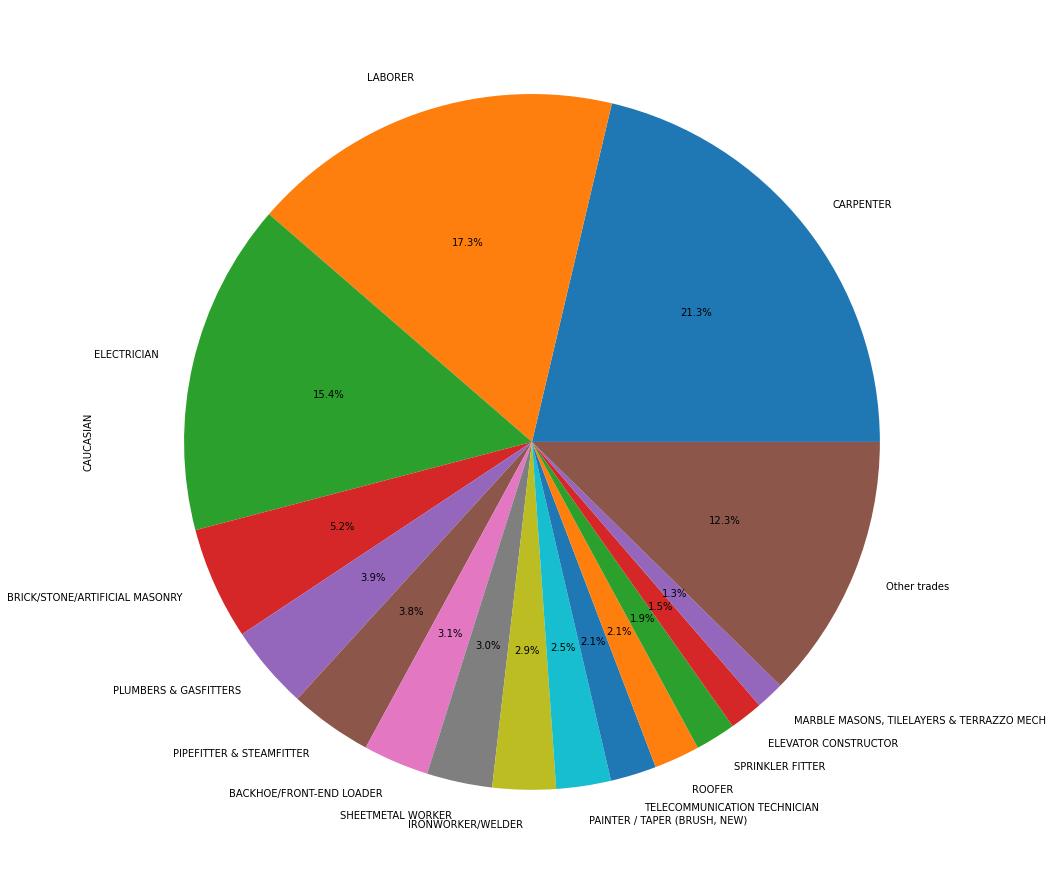

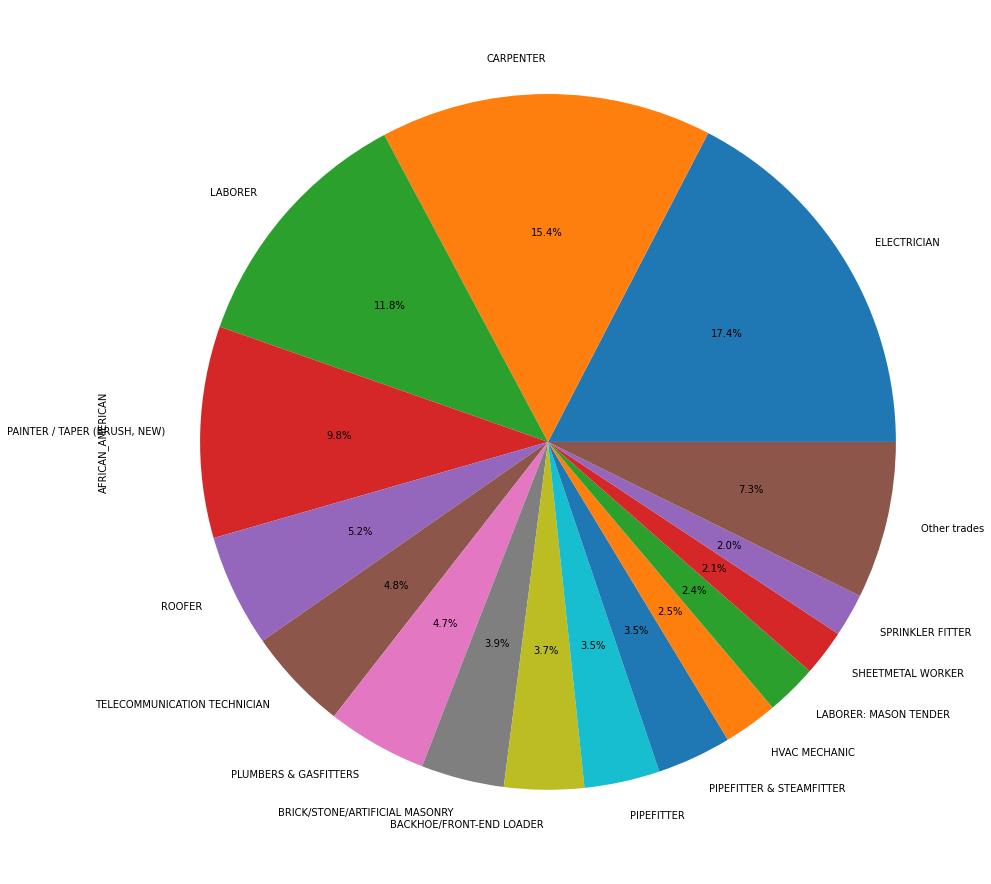

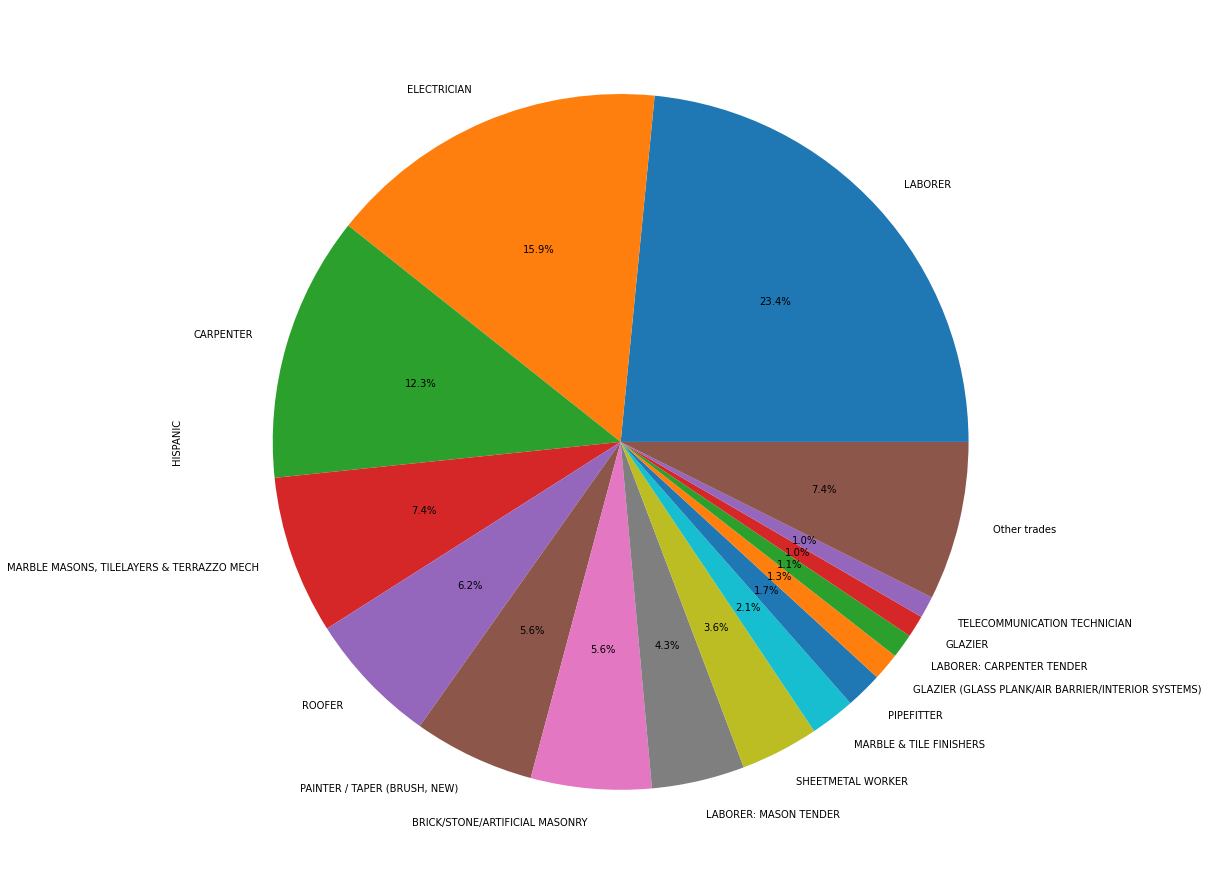

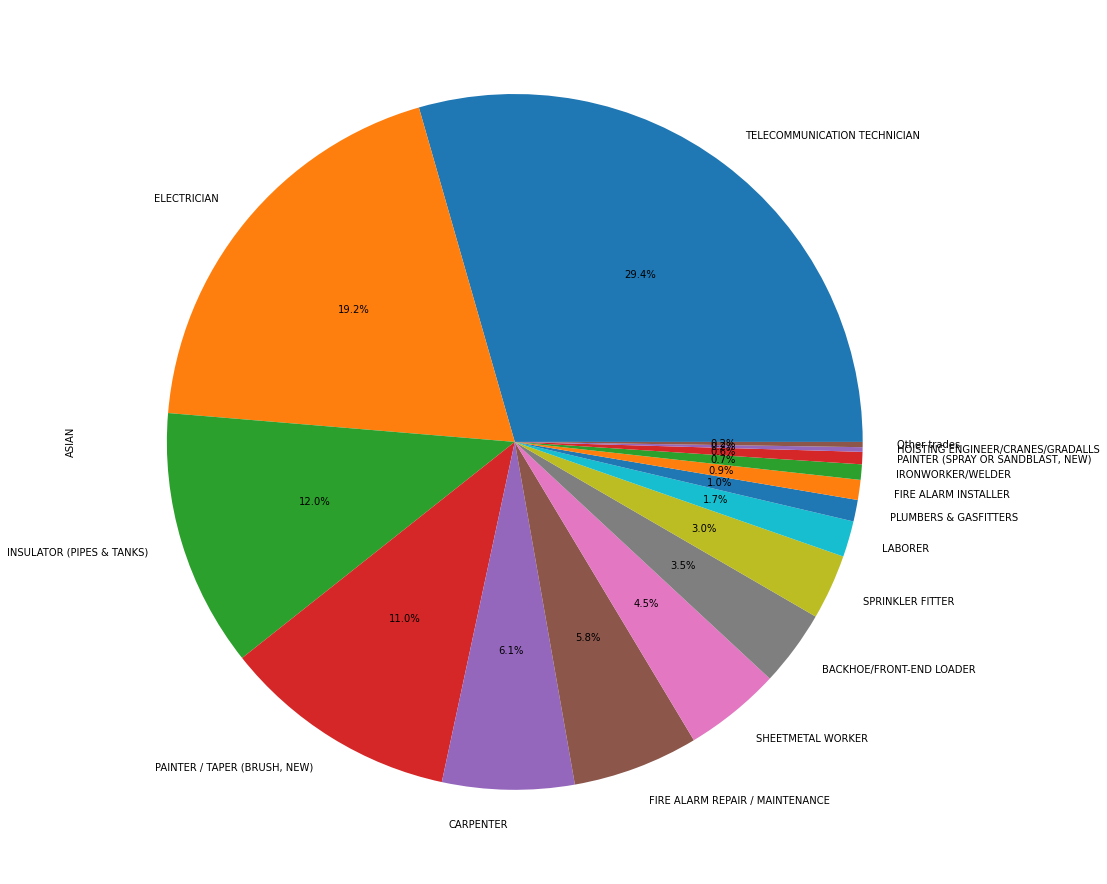

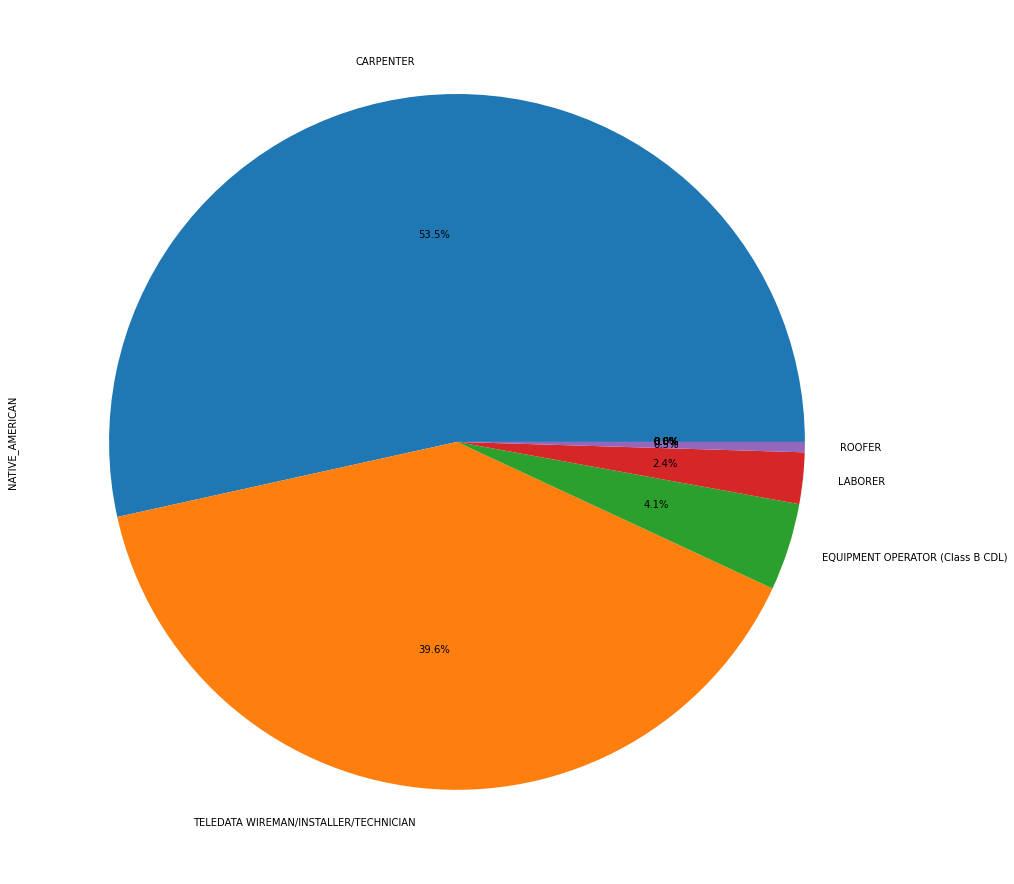

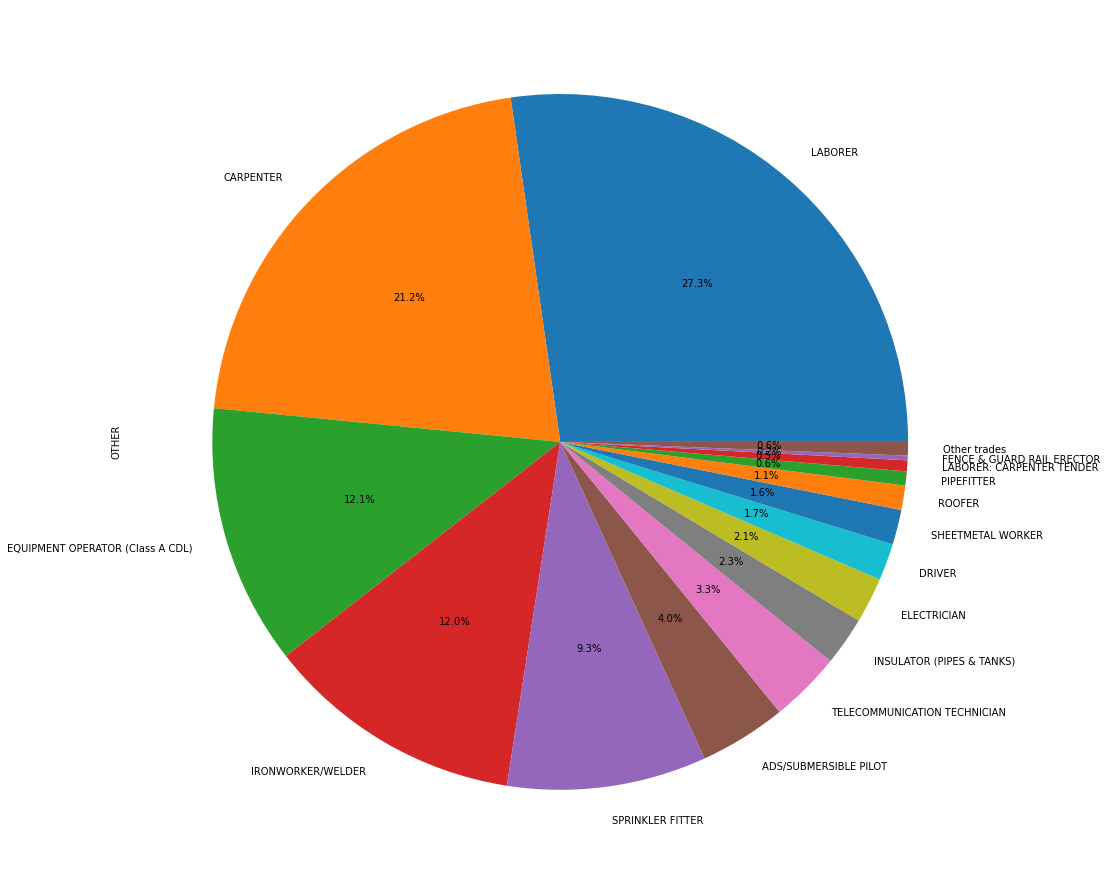

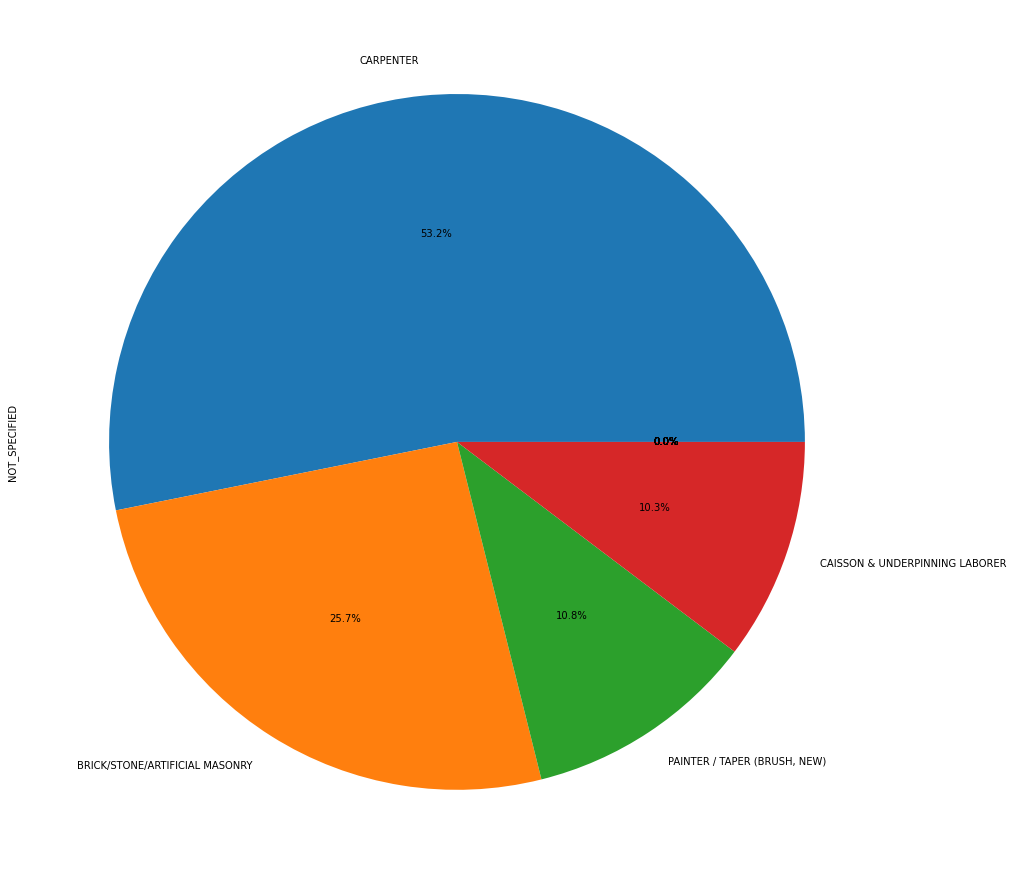

In [103]:
for eth in df_groups_2019.columns[1:]:
    df_pie = df_groups_2019.copy()
    df_eth = df_pie[['TRADE', eth]].sort_values(by=[eth],ascending=False).reset_index(drop=True)
    df_eth_pie = df_eth.iloc[:15]
    other_value = df_eth.iloc[15:].sum(axis=0)[eth]
    df_eth_pie.loc[len(df_eth_pie)] = ['Other trades', other_value]
    df_eth_pie.set_index('TRADE', inplace=True)
    # df_eth_pie.columns = ['']
    # df_eth_pie
    df_eth_pie.plot.pie(y=df_eth_pie.columns[0], figsize=(16, 16), autopct='%1.1f%%')
    # df_eth_pie.plot.pie(figsize=(16, 16), autopct='%1.1f%%', subplots=True)
    plt.gca().get_legend().remove()
    plt.savefig('./groups_dist_trades_2019/'+eth+'.png')

### 2020

In [108]:
df_groups_2020.columns[1:]

Index(['CAUCASIAN', 'AFRICAN_AMERICAN', 'HISPANIC', 'ASIAN', 'NATIVE_AMERICAN',
       'OTHER', 'NOT_SPECIFIED'],
      dtype='object')

/Users/murtada/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Users/murtada/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Users/murtada/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

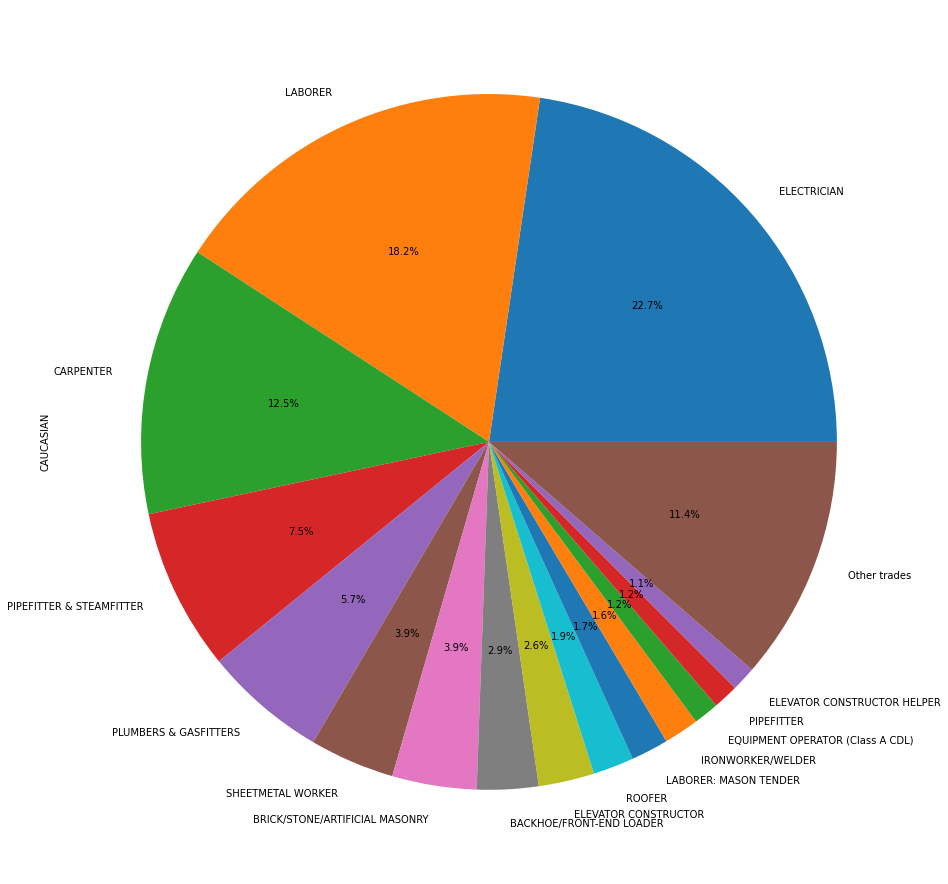

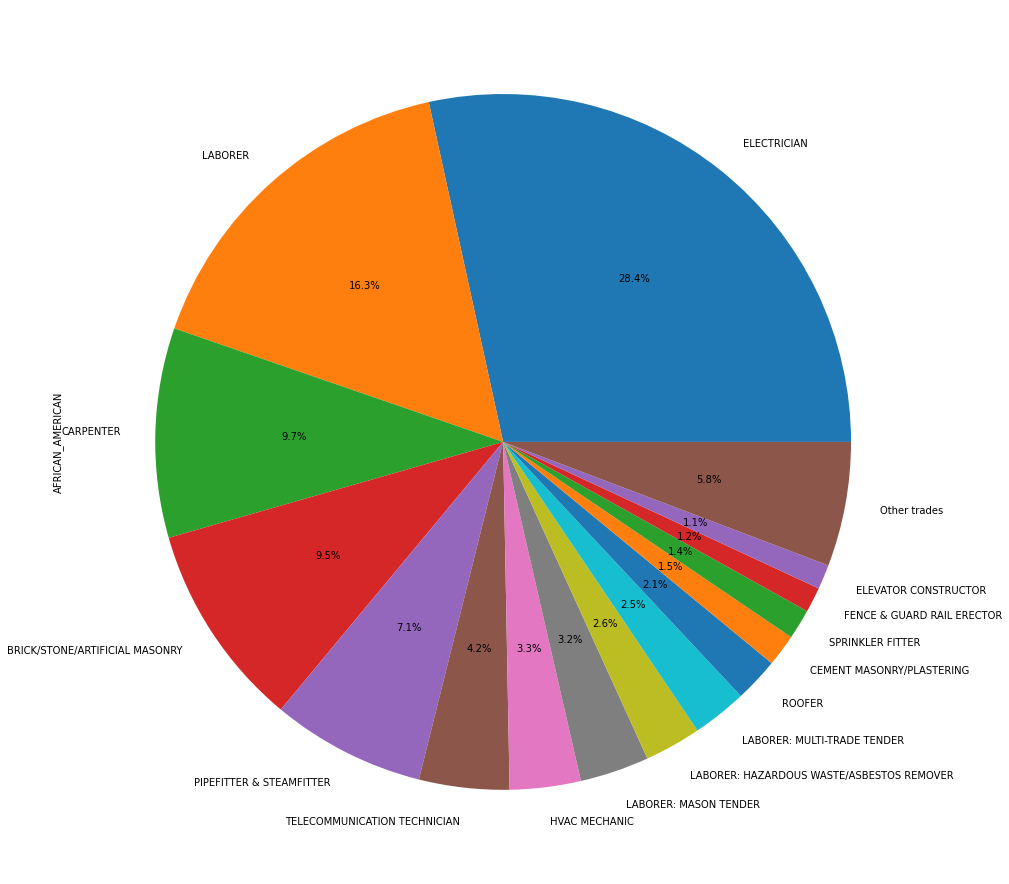

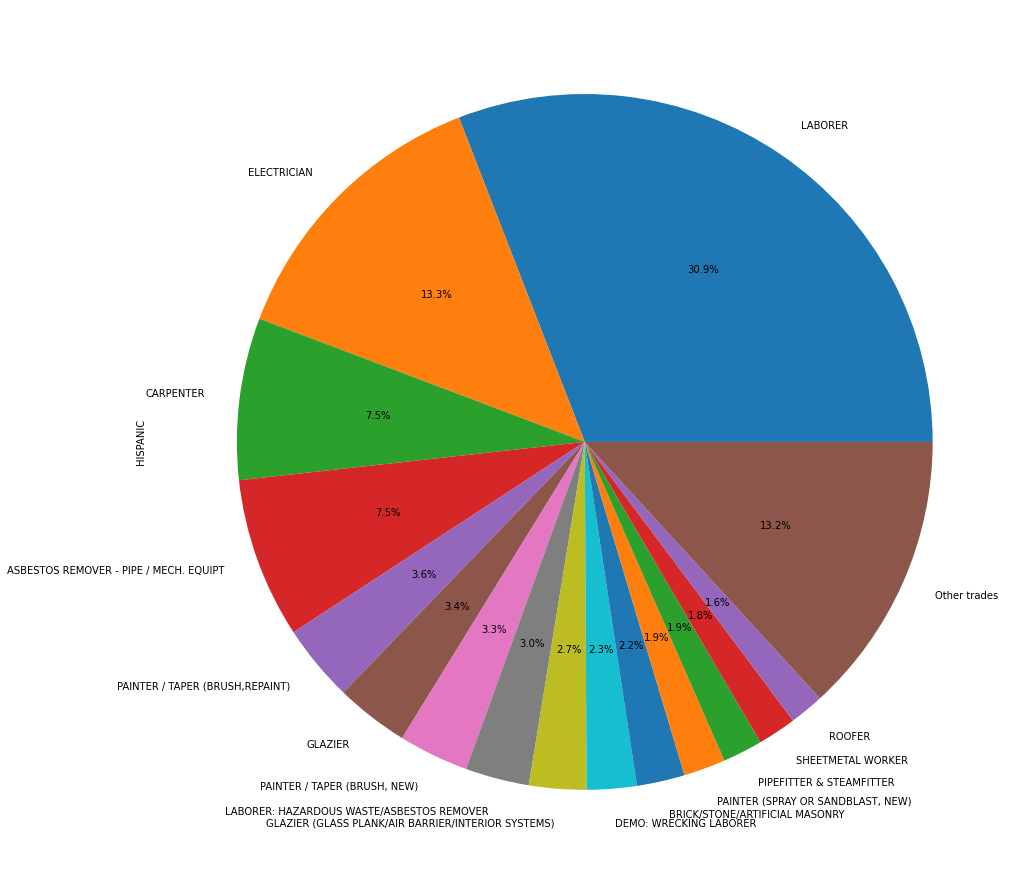

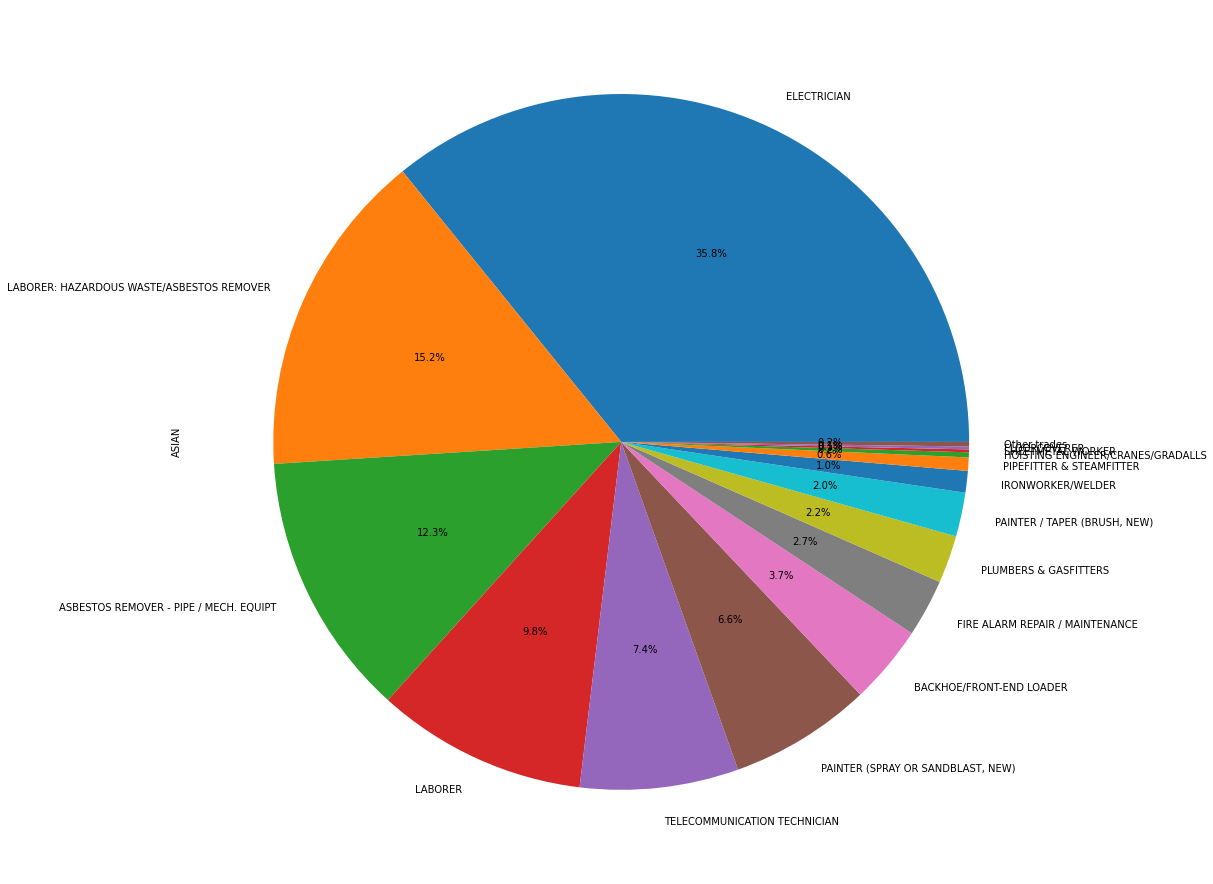

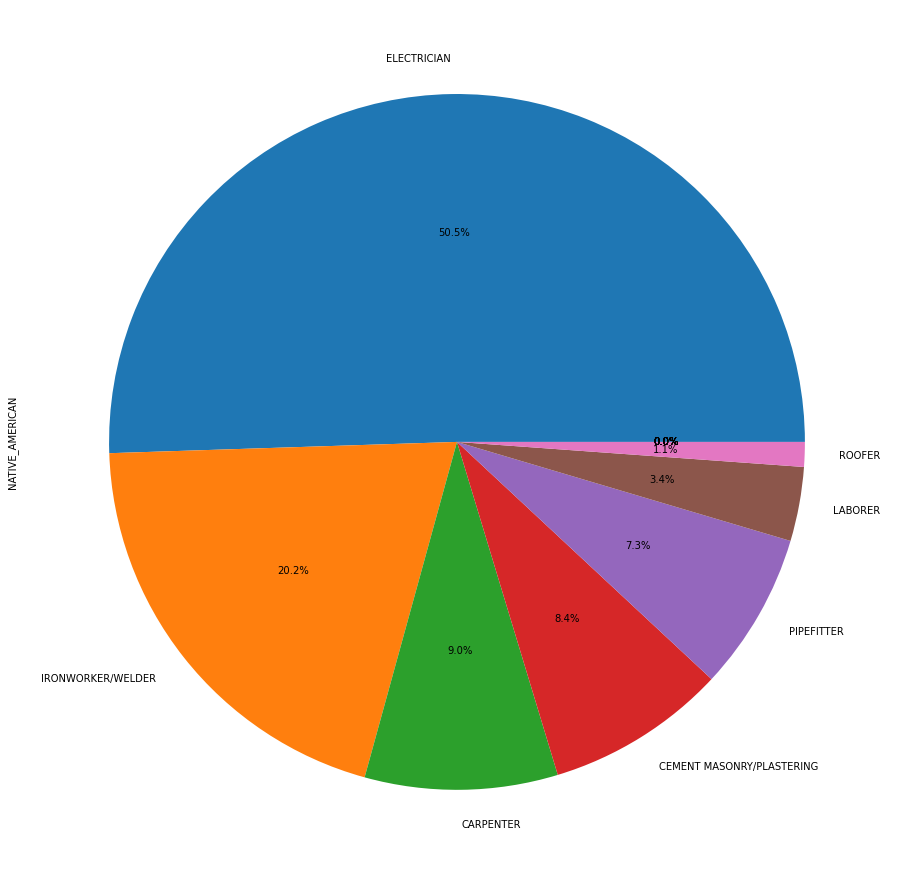

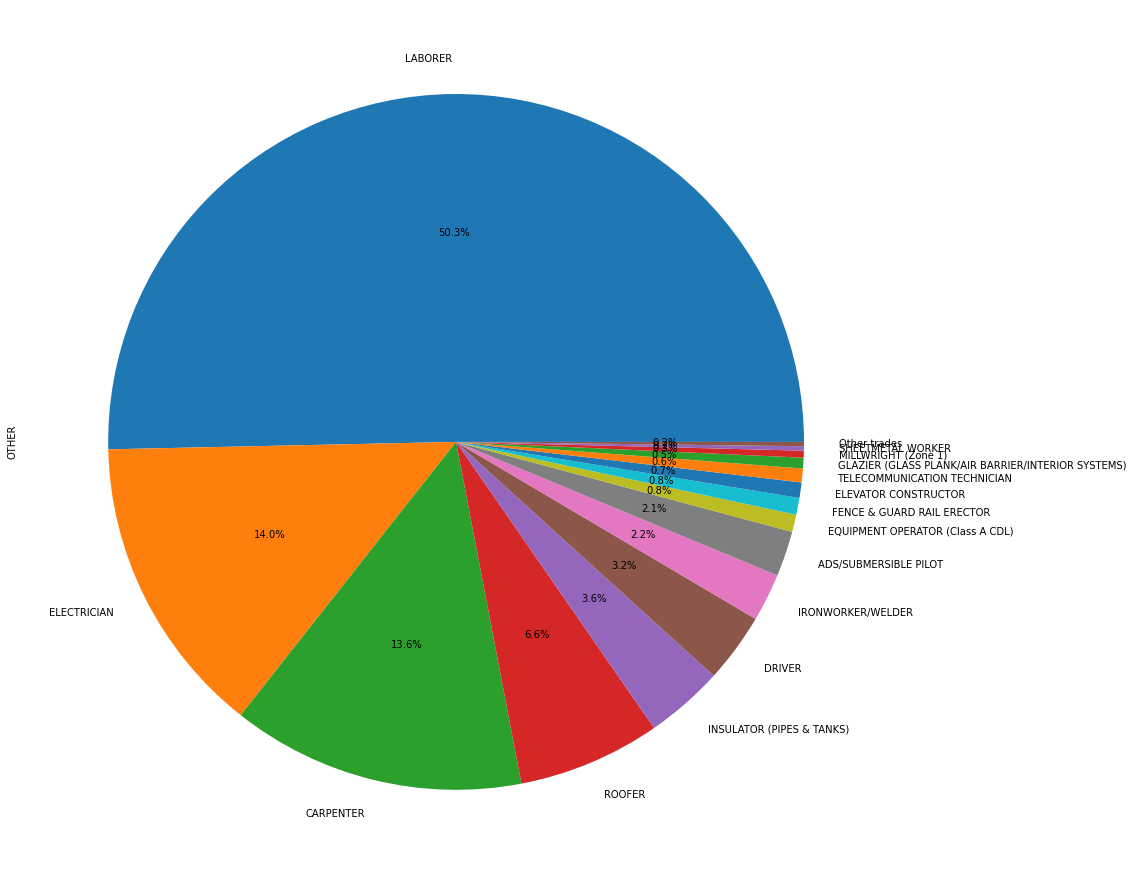

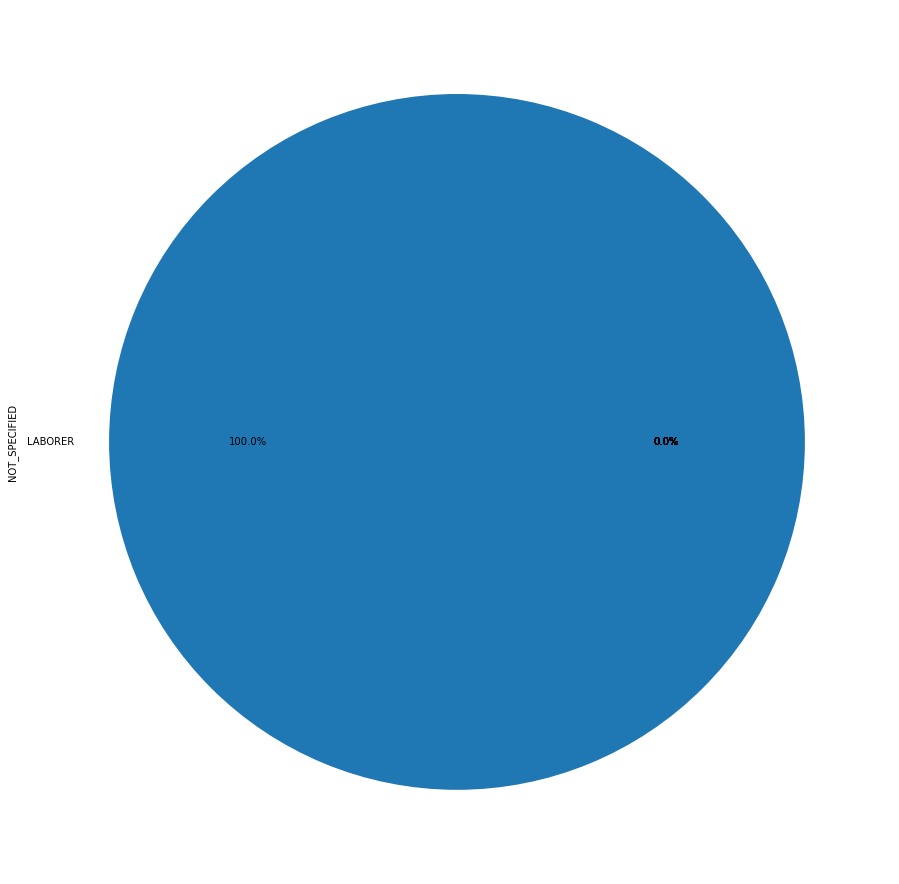

In [109]:
for eth in df_groups_2020.columns[1:]:
    df_pie = df_groups_2020.copy()
    df_eth = df_pie[['TRADE', eth]].sort_values(by=[eth],ascending=False).reset_index(drop=True)
    df_eth_pie = df_eth.iloc[:15]
    other_value = df_eth.iloc[15:].sum(axis=0)[eth]
    df_eth_pie.loc[len(df_eth_pie)] = ['Other trades', other_value]
    df_eth_pie.set_index('TRADE', inplace=True)
    # df_eth_pie.columns = ['']
    # df_eth_pie
    df_eth_pie.plot.pie(y=df_eth_pie.columns[0], figsize=(16, 16), autopct='%1.1f%%')
    # df_eth_pie.plot.pie(figsize=(16, 16), autopct='%1.1f%%', subplots=True)
    plt.gca().get_legend().remove()
    plt.savefig('./groups_dist_trades_2020/'+eth+'.png')